--- [Step 0: Installing and Importing Libraries] ---
Cloning into 'Amthal'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 76 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 1.47 MiB | 3.50 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/Amthal
--- [Step 1: Loading Data] ---
Data loaded successfully. Found 4078 instances.

Building and normalizing the contingency table for Rhetorical Functions...
Generating the heatmap...


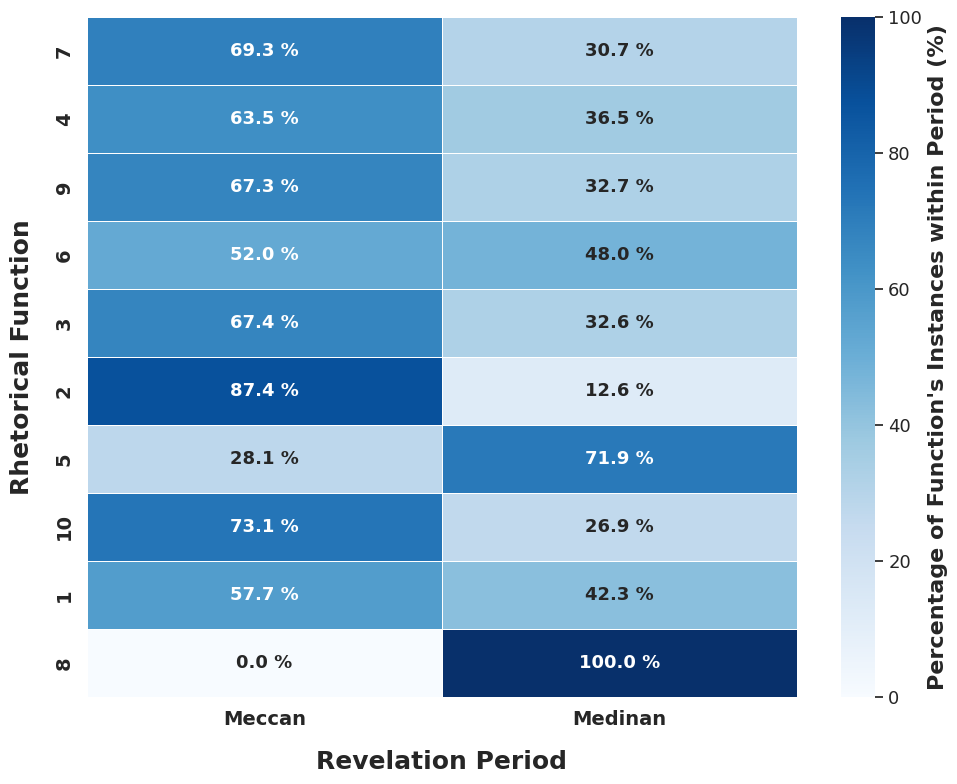

In [ ]:
#@title  **Distribution of Rhetorical Functions by Period.**

# --- [الخطوة 0: التثبيت والاستيراد] ---
print("--- [Step 0: Installing and Importing Libraries] ---")
!git clone https://github.com/NoorBayan/Amthal.git
%cd Amthal
from utility import *
from IPython.display import display, HTML, clear_output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --- [الخطوة 1: تحميل وتجهيز البيانات] ---
print("--- [Step 1: Loading Data] ---")
# ⚠️⚠️⚠️  الرجاء التأكد من أن هذا المسار صحيح في بيئتك
INSTANCES_FILE_PATH = '/content/Amthal/data/processed/instances.csv'
try:
    df = pd.read_csv(INSTANCES_FILE_PATH, sep='\t', encoding='utf-16')
    df['Dominant_Concept']=[Dominant_Concept_dic[i]['en'] for i in df.Dominant_Concept]
    df['Valence']=[Valence_dic[i]['ar'] for i in df.Valence]
    df['Revelation_Phase']=[Revelation_Phase_dic[i]['ar'] for i in df.Revelation_Phase]

    print(f"Data loaded successfully. Found {len(df)} instances.\n")
except FileNotFoundError:
    print(f"⚠️ ERROR: File not found at '{INSTANCES_FILE_PATH}'. Please check the path and try again.")
    exit()



# ترجمة عمود Revelation_Phase إلى الإنجليزية
phase_map = {'مكي': 'Meccan', 'مدني': 'Medinan'}
df['Revelation_Phase_En'] = df['Revelation_Phase'].map(phase_map)


# --- 2. بناء وتطبيع جدول الطوارئ للوظائف والفترات ---
print("Building and normalizing the contingency table for Rhetorical Functions...")

# الخطوة أ: إنشاء جدول الطوارئ (العد الخام)
# لاحظ أننا وضعنا الوظائف في الصفوف والفترات في الأعمدة
func_period_counts = pd.crosstab(df['Rhetorical_Function'], df['Revelation_Phase_En'])

# الخطوة ب: التطبيع (Normalization) للحصول على نسب مئوية لكل صف (وظيفة)
# .div(func_period_counts.sum(axis=1), axis=0) يقسم كل صف على مجموعه
normalized_table = func_period_counts.div(func_period_counts.sum(axis=1), axis=0) * 100

# فرز الصفوف بناءً على إجمالي التكرارات لجعل الرسم أكثر تنظيمًا
total_counts = df['Rhetorical_Function'].value_counts()
normalized_table = normalized_table.loc[total_counts.index]


# --- 3. إعداد الرسم البياني الاحترافي (Heatmap) ---
print("Generating the heatmap...")
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 8))

# إنشاء الخريطة الحرارية
# cmap='Blues' أو 'Reds' جيد لإظهار التركيز في عمود واحد
# annot=True لإظهار النسب المئوية
heatmap = sns.heatmap(
    normalized_table,
    annot=True,
    fmt=".1f",       # تنسيق الأرقام
    linewidths=.5,
    cmap='Blues',    # تدرج لوني واحد يظهر التركيز
    cbar_kws={'label': 'Percentage of Function\'s Instances within Period (%)'},
    ax=ax
)

# --- 4. إضافة التحسينات البصرية ---
ax.set_xlabel(
    'Revelation Period',
    fontsize=18,            # حجم أكبر
    fontweight='bold',      # خط عريض
    labelpad=15
)
ax.set_ylabel(
    'Rhetorical Function',
    fontsize=18,
    fontweight='bold',
    labelpad=15
)

# تكبير القيم على المحورين وجعلها بخط عريض
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# إضافة علامة '%' إلى الأرقام داخل الخلايا وجعلها بخط أكبر وعريض
for t in heatmap.texts:
    t.set_text(t.get_text() + " %")
    t.set_fontsize(13)
    t.set_fontweight('bold')

# تكبير خط عنوان مقياس الألوان (Colorbar)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
cbar.ax.yaxis.label.set_size(16)
cbar.ax.yaxis.label.set_fontweight('bold')

# إزالة الإطار وتجميل الشكل العام
sns.despine(left=True, bottom=True)

# --- 5. الحفظ والعرض ---
plt.tight_layout()
plt.savefig('Figure_5c_Function_Distribution_Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
